# Perkenalan

In [1]:
'''
=================================================
Milestone 02 PHASE 1

Nama  : Dendy Dwinanda
Batch : RMT-030

Program ini dibuat untuk melakukan prediksi pada 
niat beli konsumen online pada sebuah e-commerce. 

Analisis SMART :
- Spesific = Membuat prediksi pada niat beli konsumen 
online pada sebuah e-commerce.

- Measurable = Menganalisa perilaku antar pengguna web 
pada keputusan pembelian.

- Achievable = Medapatkan hasil prediksi dari setiap 
data pengguna web dalam keputusan pembelian.

- Relevant = Membantu bagian terkait untuk melihat 
perilaku konsumen dalam memprediksi keputusan konsumen.

- Time-bound = Model prediksi akan dievaluasi dalam 3
bulan kedepan untuk meningkatkan akurasi analisa.

=================================================
'''

'\n=================================================\nMilestone 02 PHASE 1\n\nNama  : Dendy Dwinanda\nBatch : RMT-030\n\nProgram ini dibuat untuk melakukan prediksi pada \nniat beli konsumen online pada sebuah e-commerce. \n\nAnalisis SMART :\n- Spesific = Membuat prediksi pada niat beli konsumen \nonline pada sebuah e-commerce.\n\n- Measurable = Menganalisa perilaku antar pengguna web \npada keputusan pembelian.\n\n- Achievable = Medapatkan hasil prediksi dari setiap \ndata pengguna web dalam keputusan pembelian.\n\n- Relevant = Membantu bagian terkait untuk melihat \nperilaku konsumen dalam memprediksi keputusan konsumen.\n\n- Time-bound = Model prediksi akan dievaluasi dalam 3\nbulan kedepan untuk meningkatkan akurasi analisa.\n\n=================================================\n'

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import json, pickle


# Data Loading

In [3]:
# Data loading
data = pd.read_csv('online_shoppers_intention.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [5]:
data.tail(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12320,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
12321,0,0.00,0,0.0,6,0.000000,0.200000,0.200000,0.000000,0.0,Nov,1,8,4,1,Returning_Visitor,False,False
12322,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.000000,0.0,Dec,2,2,4,2,Returning_Visitor,False,False
12323,2,64.75,0,0.0,44,1157.976190,0.000000,0.013953,0.000000,0.0,Nov,2,2,1,10,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12325,3,145.00,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.00,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.00,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.00,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.00,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [6]:
# mencari data duplicated
data.duplicated().sum()

125

In [7]:
# menghapus data duplicated
data_set = data.drop_duplicates()
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

In [8]:
# check data null value
data_set.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
# rename target
data_clean = data_set.rename(columns={'Revenue' : 'Buying'})

In [10]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

In [11]:
data_clean.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Exploratory Data Analysis (EDA)

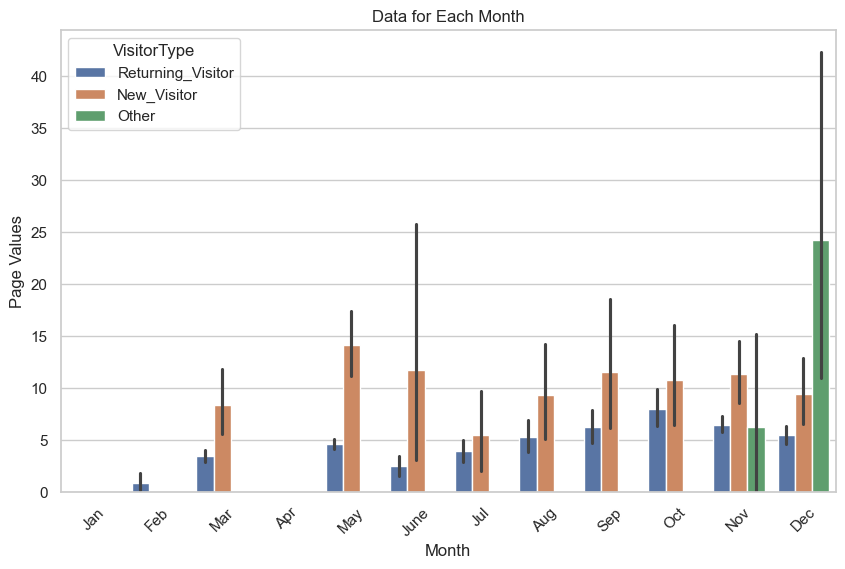

In [12]:
# Plot data untuk setiap bulan
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='PageValues', data=data_clean, hue="VisitorType", order=month_order)
plt.xlabel('Month')
plt.ylabel('Page Values')
plt.title('Data for Each Month')
plt.xticks(rotation=45)  # Untuk memutar label bulan agar terbaca lebih baik
plt.show()

Insight :
- Barplot diatas menunjukan banyaknya data visit setiap bulan berdasarkan tipe visitor terhadap Page Values dimana pengunjung baru memberikan nilai besar di setiap bulannya. Fiture "Page Values" menunjukkan nilai rata-rata untuk halaman web yang dikunjungi pengguna sebelum menyelesaikan transaksi e-commerce.

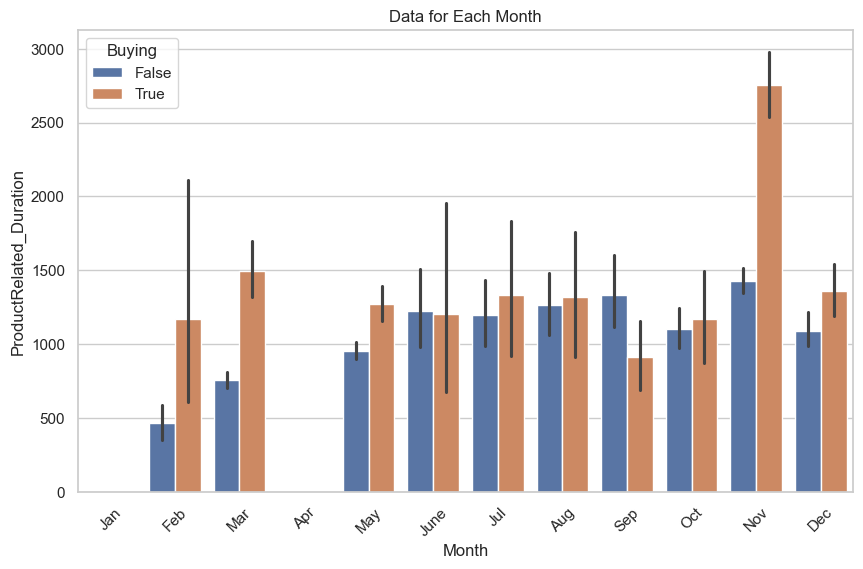

In [13]:
# Plot data untuk setiap bulan
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='ProductRelated_Duration', data=data_clean, hue="Buying", order=month_order)
plt.xlabel('Month')
plt.ylabel('ProductRelated_Duration')
plt.title('Data for Each Month')
plt.xticks(rotation=45)  # Untuk memutar label bulan agar terbaca lebih baik
plt.show()

Insight :

- Visualisasi diatas menunjukan bahwa pembeli produk membutuhkan waktu yang lebih lama untuk melihat page Produk terkait dibandingkan dengan dengan visitor yang tidak membeli.

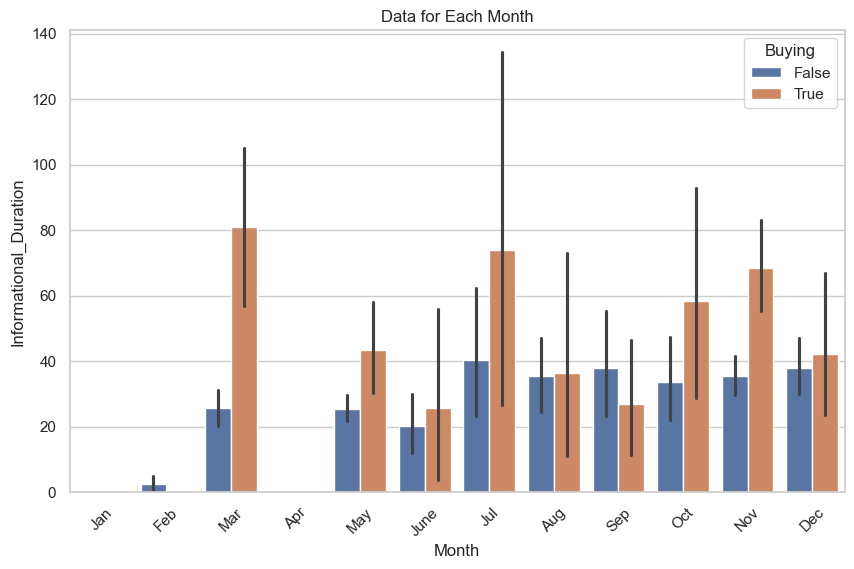

In [14]:
# Plot data untuk setiap bulan
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Informational_Duration', data=data_clean, hue="Buying", order=month_order)
plt.xlabel('Month')
plt.ylabel('Informational_Duration')
plt.title('Data for Each Month')
plt.xticks(rotation=45)  # Untuk memutar label bulan agar terbaca lebih baik
plt.show()

Insight :
- Visualisasi diatas menunjukan bahwa visitor dengan membeli barang membutuhkan waktu yang lebih lama untuk membaca informasi produk dibandingkan dengan yang tidak membeli

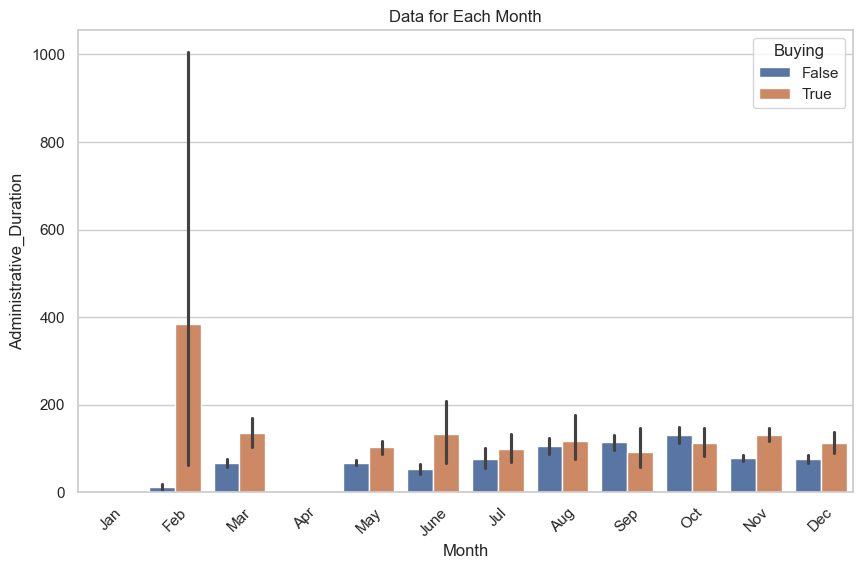

In [15]:
# Plot data untuk setiap bulan
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Administrative_Duration', data=data_clean, hue="Buying", order=month_order)
plt.xlabel('Month')
plt.ylabel('Administrative_Duration')
plt.title('Data for Each Month')
plt.xticks(rotation=45)  # Untuk memutar label bulan agar terbaca lebih baik
plt.show()

Insight :
- Visualisasi diatas menunjukan bahwa rata-rata pengunjung dengan membeli sebuah barang memiliki durasi waktu lebih lama didalam page administratif

C:\Users\dwina\AppData\Local\Temp\ipykernel_11620\2176712636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x= data_clean['Buying'], y= data_clean['ExitRates'], palette='Blues')


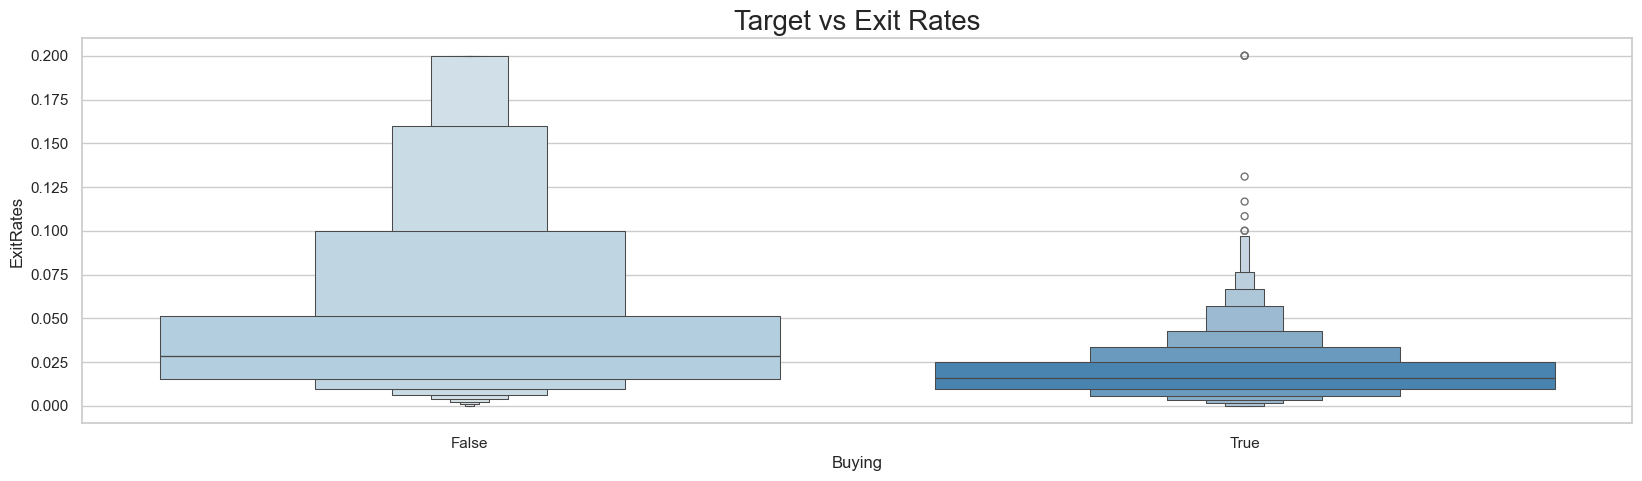

In [16]:
#  Melihat distribusi antara target dengan Exitrates
plt.figure(figsize=(20,5))
sns.boxenplot(x= data_clean['Buying'], y= data_clean['ExitRates'], palette='Blues')
plt.title('Target vs Exit Rates', fontsize = 20)
plt.show()

C:\Users\dwina\AppData\Local\Temp\ipykernel_11620\3873750263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x= data_clean['Buying'], y= data_clean['BounceRates'], palette='Blues')


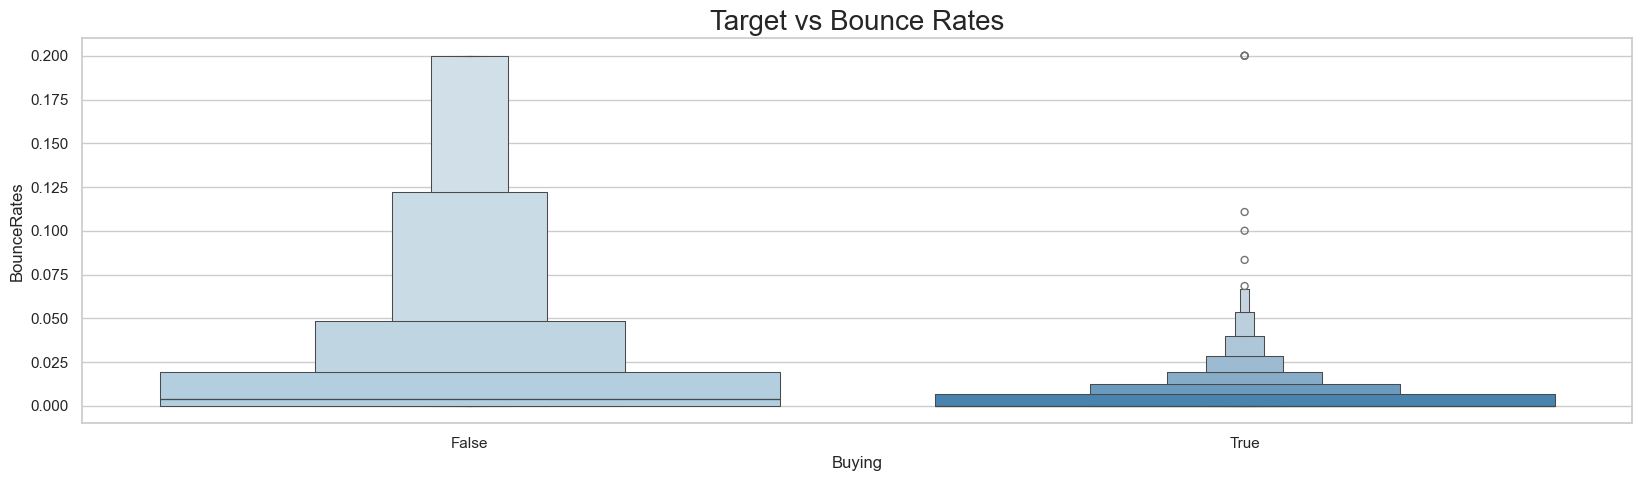

In [17]:
#  Melihat distribusi antara target dengan bounce rates
plt.figure(figsize=(20,5))
sns.boxenplot(x= data_clean['Buying'], y= data_clean['BounceRates'], palette='Blues')
plt.title('Target vs Bounce Rates', fontsize = 20)
plt.show()

C:\Users\dwina\AppData\Local\Temp\ipykernel_11620\2326218587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x= data_clean['Buying'], y= data_clean['PageValues'], palette='Blues')


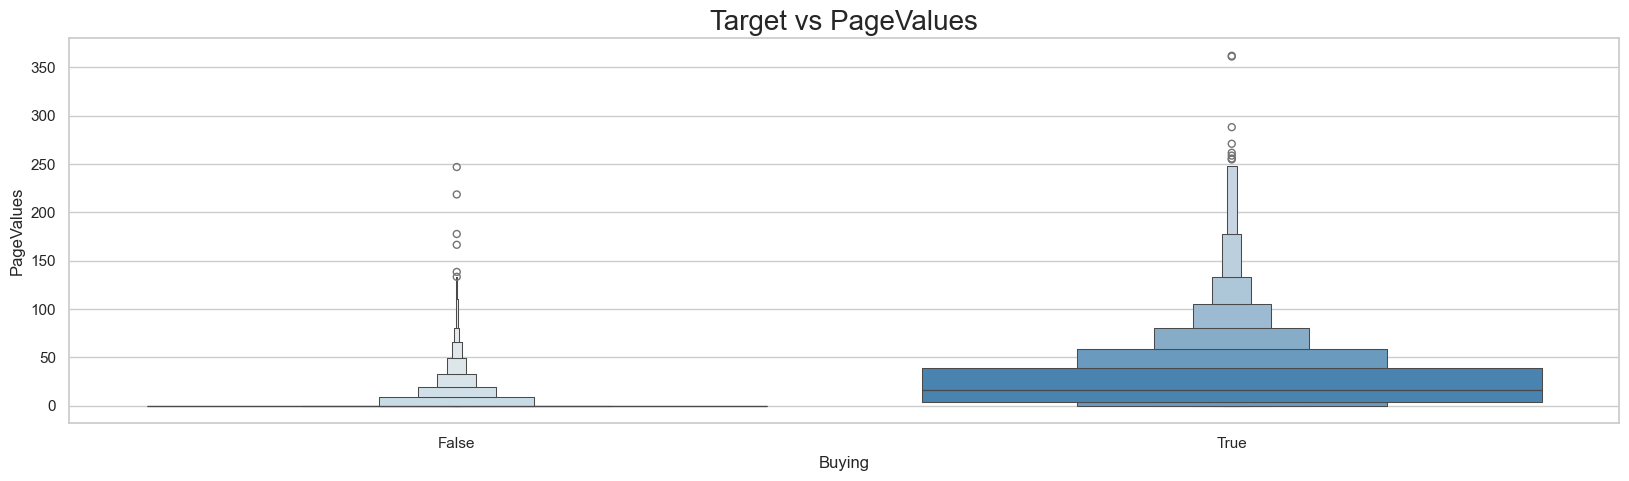

In [18]:
#  Melihat distribusi antara target dengan pages value
plt.figure(figsize=(20,5))
sns.boxenplot(x= data_clean['Buying'], y= data_clean['PageValues'], palette='Blues')
plt.title('Target vs PageValues', fontsize = 20)
plt.show()

Insight :

- Visualisasi menunjukan nilai rata-rata Exit Rates pengunjung yang melakukan pembelian lebih kecil dibandingkan dengan tidak membeli.
- Visualisasi menunjukan nilai rata-rata Bounce Rates pengunjung yang melakukan pembelian lebih kecil dibandingkan dengan yang tidak membeli.
- Visualisasi menunjukan nilai rata-rata Page Values pengunjung yang melakukan pembelian lebih besar dibandingkan dengan yang tidak melakukan pembelian.

# Feature Engineering

In [19]:
# Split feature dan target

X = data_clean.drop('Buying', axis=1)
y = data_clean['Buying']

# Split antara Train-set dan Test-set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (9764,)
Test Size  :  (2441,)


In [20]:
# define kategorical dan numerical kolom
num_cols = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']
kat_cols = ['Month','Region','VisitorType','Weekend']

In [21]:
# define data categorical dan numeric

# melakukan seleksi data kategorikal
x_train_kat = X_train[kat_cols]
x_test_kat = X_test[kat_cols]

# melakukan seleksi data numerikal
x_train_num = X_train[num_cols]
x_test_num = X_test[num_cols]

## Handling Numerical Columns

In [22]:
# mencari nilai skewness
for column in x_train_num:
    skew_columns = x_train_num[column].skew()
    print(f"Column '{column}' has skewed distribution {skew_columns}.")

Column 'Administrative' has skewed distribution 1.9517005856229657.
Column 'Administrative_Duration' has skewed distribution 5.622545550968428.
Column 'Informational' has skewed distribution 4.092659011482587.
Column 'Informational_Duration' has skewed distribution 7.567010026902685.
Column 'ProductRelated' has skewed distribution 4.46670572136501.
Column 'ProductRelated_Duration' has skewed distribution 7.692794789556514.
Column 'BounceRates' has skewed distribution 3.1456916720260883.
Column 'ExitRates' has skewed distribution 2.218859777260161.
Column 'PageValues' has skewed distribution 6.136480655600616.
Column 'SpecialDay' has skewed distribution 3.3535332047746436.


In [23]:
# Visualisasi persebaran data tiap kolom
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

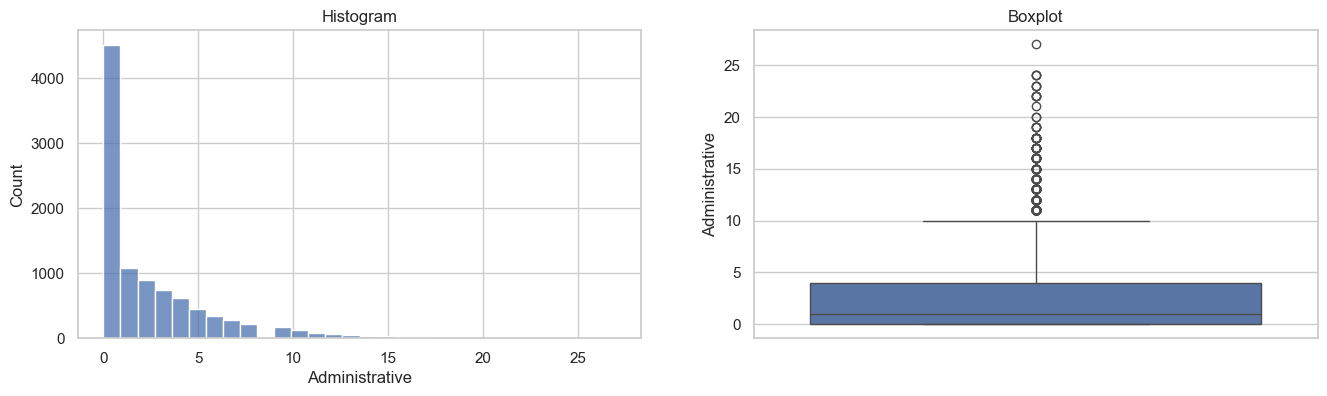

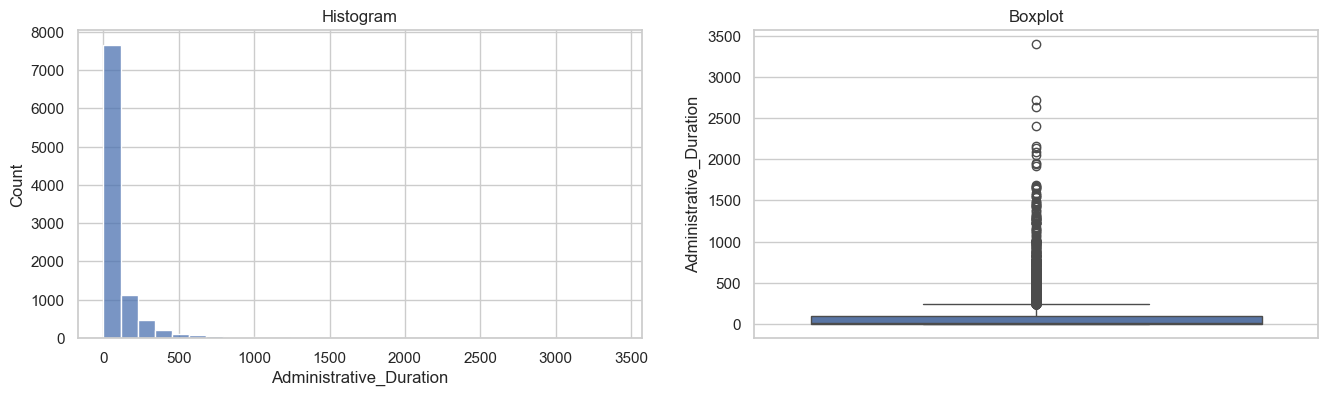

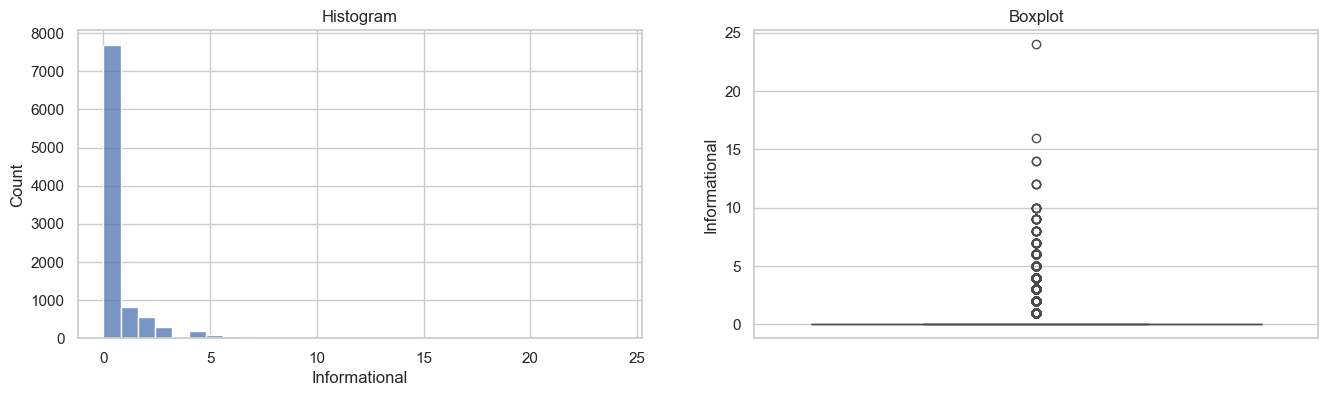

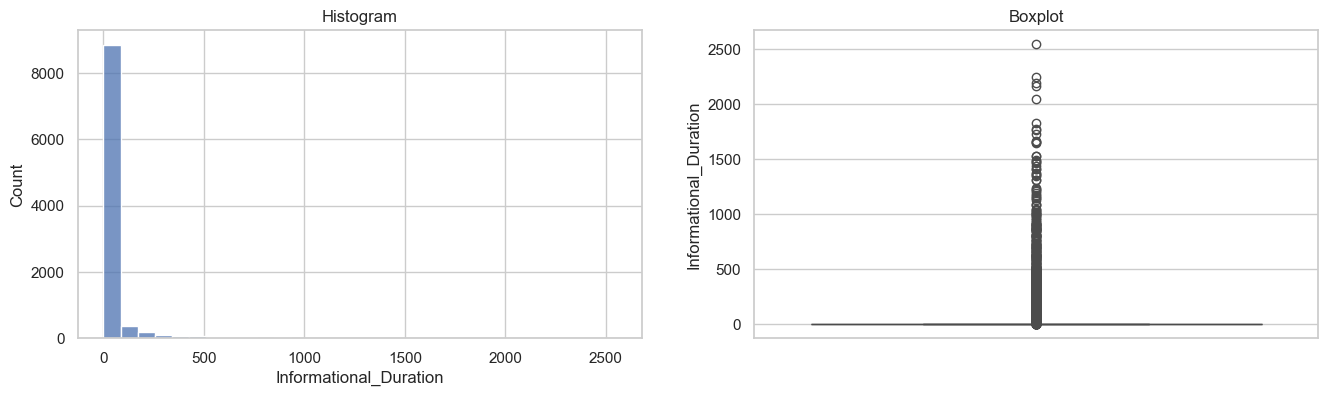

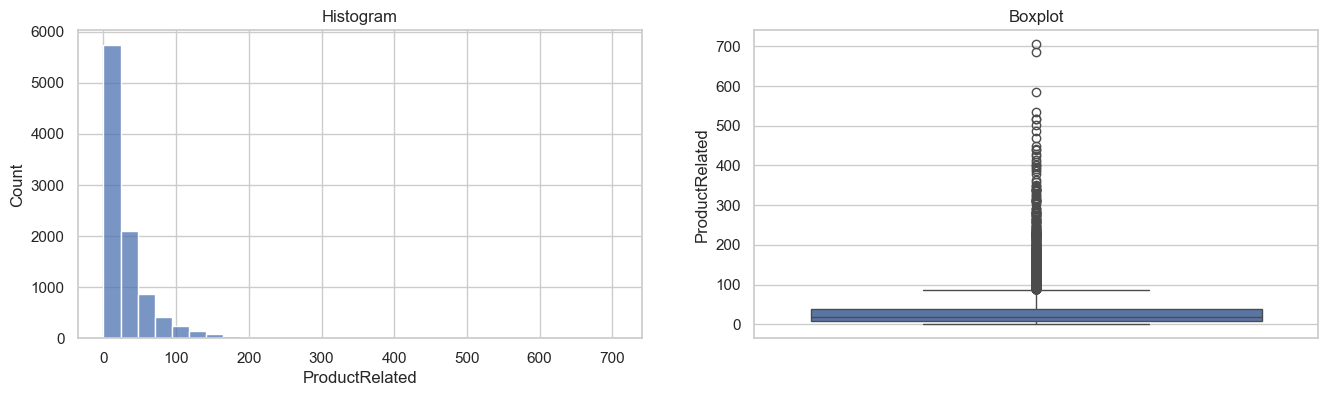

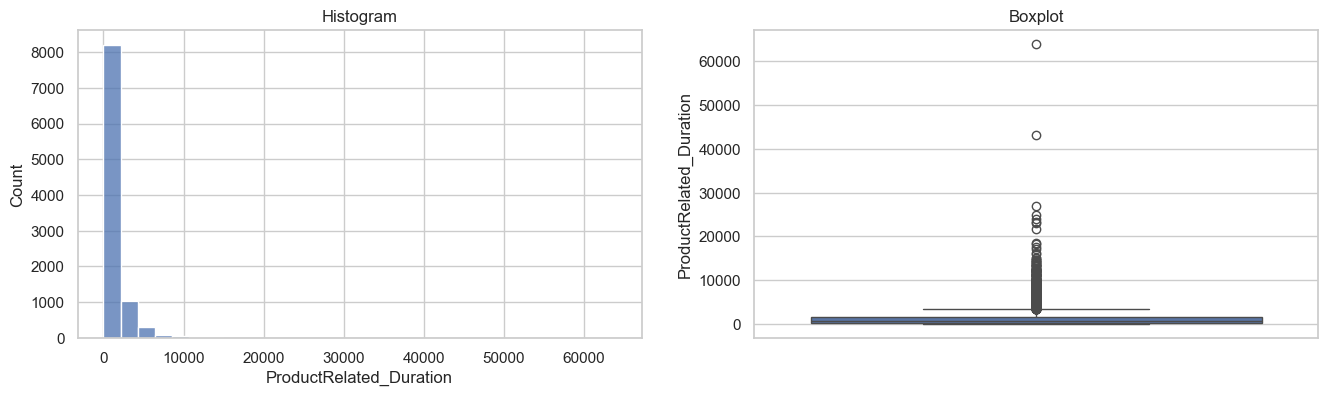

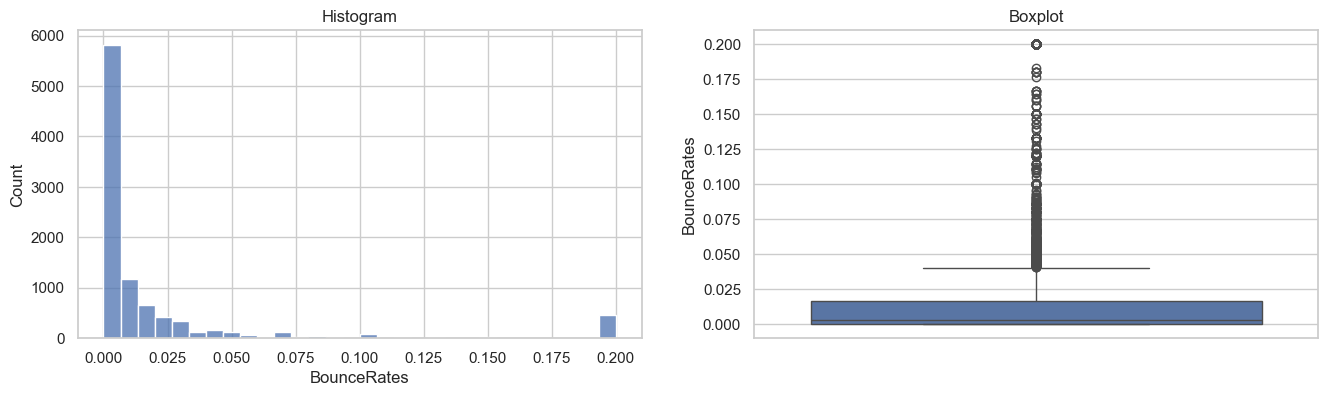

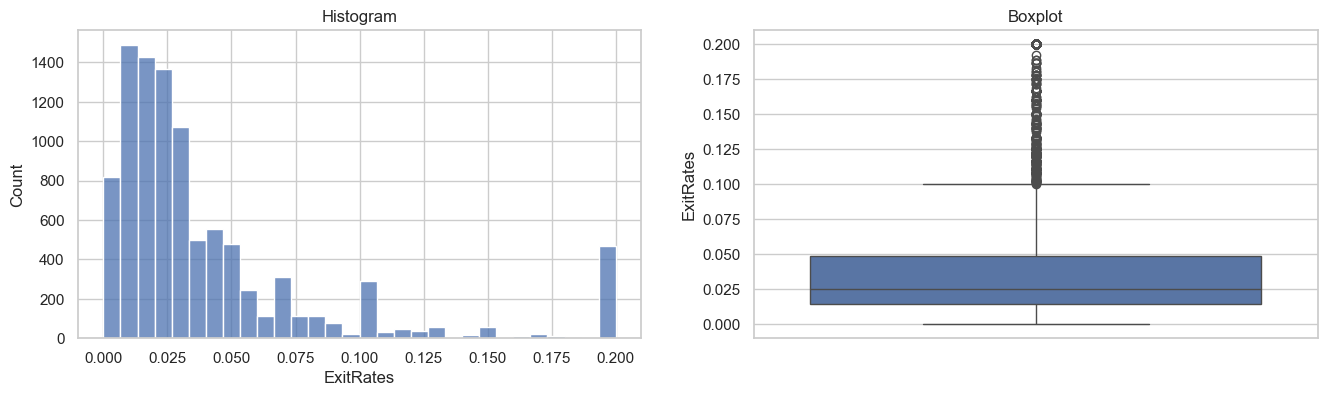

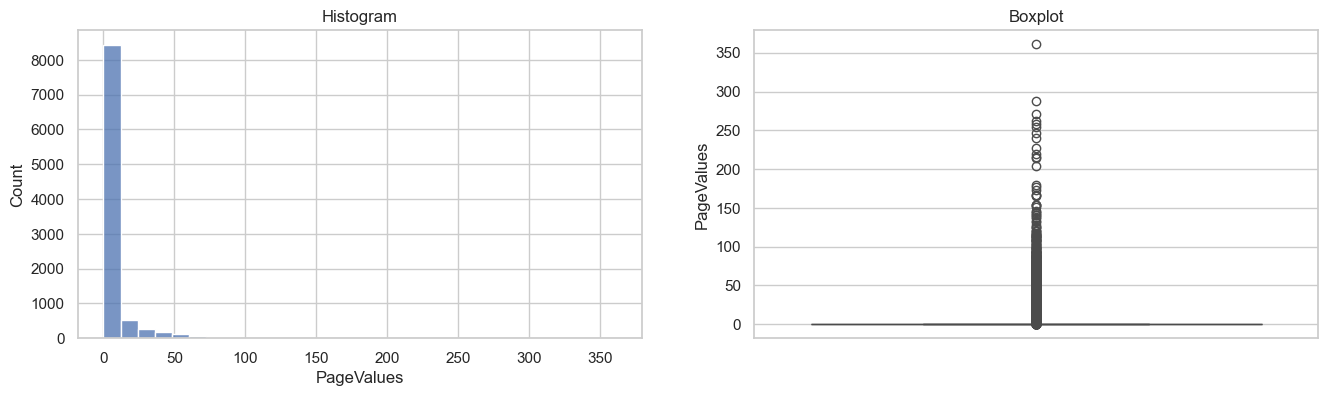

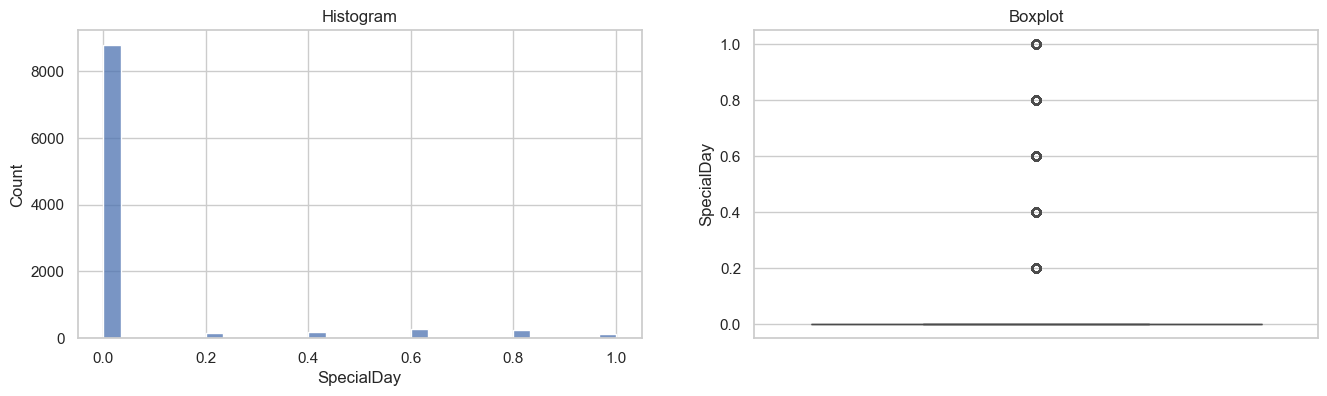

In [24]:
# visualisasi kemiringan dari beberapa data tiap kolom

for column in x_train_num:
    box_plot = diagnostic_plots(x_train_num, column)

In [25]:
# memisahkan kolom dengan banyak outlier
kolom_wins = ['Administrative', 'Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']
kolom_non_wins = ['Informational', 'Informational_Duration', 'PageValues', 'SpecialDay']

x_train_num_non = x_train_num[kolom_non_wins].copy()
x_test_num_non = x_test_num[kolom_non_wins].copy()

# winsorizing data dengan banyak oulier
for column in data_clean[kolom_wins]:
    winsorized = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=[column])
    x_train_num_capping = winsorized.fit_transform(x_train_num[kolom_wins])
    x_test_num_capping = winsorized.transform(x_test_num[kolom_wins])

x_train_num_capping

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
3381,0,0.000000,14,1340.750000,0.000000,0.015385
2626,5,106.321429,37,1306.028022,0.004264,0.010939
1223,0,0.000000,4,102.000000,0.000000,0.050000
2212,1,10.000000,82,706.299603,0.000000,0.002439
7934,0,0.000000,2,8.000000,0.000000,0.100000
...,...,...,...,...,...,...
669,2,20.500000,21,719.738095,0.004348,0.010435
2502,0,0.000000,7,61.333333,0.014286,0.068571
2541,0,0.000000,50,998.954545,0.007600,0.025933
7627,1,63.400000,6,137.600000,0.000000,0.013333


In [26]:
# merger data capping dan non capping
x_train_num_capping_final = pd.concat([x_train_num_capping, x_train_num_non], axis=1)
x_test_num_capping_final = pd.concat([x_test_num_capping, x_test_num_non], axis=1)
x_train_num_capping_final

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Informational,Informational_Duration,PageValues,SpecialDay
3381,0,0.000000,14,1340.750000,0.000000,0.015385,0,0.0,57.588923,0.6
2626,5,106.321429,37,1306.028022,0.004264,0.010939,4,189.0,33.333581,0.0
1223,0,0.000000,4,102.000000,0.000000,0.050000,0,0.0,0.000000,0.0
2212,1,10.000000,82,706.299603,0.000000,0.002439,0,0.0,0.000000,1.0
7934,0,0.000000,2,8.000000,0.000000,0.100000,0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
669,2,20.500000,21,719.738095,0.004348,0.010435,0,0.0,0.000000,0.0
2502,0,0.000000,7,61.333333,0.014286,0.068571,0,0.0,0.000000,0.0
2541,0,0.000000,50,998.954545,0.007600,0.025933,0,0.0,0.000000,0.8
7627,1,63.400000,6,137.600000,0.000000,0.013333,0,0.0,0.000000,0.0


### Scalling

In [27]:
# Inisialisasi scaler
scaler = StandardScaler()

# fit scaler ke dalam data
scaler.fit(x_train_num_capping_final) # .fit() hanya boleh dilakukan terhadap train, tidak boleh di test-set!!!!!!!!!

# Transform data x_train_num
x_train_num_scaled = scaler.transform(x_train_num_capping_final)
x_test_num_scaled = scaler.transform(x_test_num_capping_final)

In [28]:
x_train_num_scaled_df = pd.DataFrame(x_train_num_scaled, columns=x_train_num_capping_final.columns)
x_test_num_scaled_df = pd.DataFrame(x_test_num_scaled, columns=x_test_num_capping_final.columns)
x_train_num_scaled_df

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Informational,Informational_Duration,PageValues,SpecialDay
0,-0.702244,-0.458424,-0.403387,0.064906,-0.450196,-0.615846,-0.395935,-0.244277,2.756462,2.761884
1,0.800103,0.136711,0.105043,0.047138,-0.356152,-0.730962,2.758622,1.094582,1.460461,-0.305922
2,-0.702244,-0.458424,-0.624443,-0.568990,-0.450196,0.280529,-0.395935,-0.244277,-0.320604,-0.305922
3,-0.401775,-0.402449,1.099796,-0.259756,-0.450196,-0.951075,-0.395935,-0.244277,-0.320604,4.807088
4,-0.702244,-0.458424,-0.668655,-0.617092,-0.450196,1.575292,-0.395935,-0.244277,-0.320604,-0.305922
...,...,...,...,...,...,...,...,...,...,...
9759,-0.101305,-0.343675,-0.248648,-0.252880,-0.354294,-0.744023,-0.395935,-0.244277,-0.320604,-0.305922
9760,-0.702244,-0.458424,-0.558127,-0.589800,-0.135089,0.761441,-0.395935,-0.244277,-0.320604,-0.305922
9761,-0.702244,-0.458424,0.392416,-0.109998,-0.282559,-0.342684,-0.395935,-0.244277,-0.320604,3.784486
9762,-0.401775,-0.103542,-0.580232,-0.550772,-0.450196,-0.668964,-0.395935,-0.244277,-0.320604,-0.305922


## Encoding

### Label Encoding

In [29]:
# Target encoding dengan label encoder
labelEncoder = LabelEncoder()
y_train_encoded = labelEncoder.fit_transform(y_train)
y_test_encoded = labelEncoder.transform(y_test)
y_train_encoded

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### One Hot Encoder

In [30]:
# Kategorical encoding
ohe = OneHotEncoder()
x_train_kat_enc = ohe.fit_transform(x_train_kat)
x_test_kat_enc = ohe.transform(x_test_kat)
x_train_kat_enc

<9764x24 sparse matrix of type '<class 'numpy.float64'>'
	with 39056 stored elements in Compressed Sparse Row format>

In [31]:
# mengambil setiap unik value dari encoder
feature_names = ohe.get_feature_names_out()
feature_names

array(['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5',
       'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True'],
      dtype=object)

In [32]:
# merubah data kategorical yang sudah di encoder menjadi data frame
x_train_kat_df = pd.DataFrame(x_train_kat_enc.toarray(), columns=feature_names)
x_test_kat_df = pd.DataFrame(x_test_kat_enc.toarray(), columns=feature_names)


## Feature Selection

In [33]:
# menggabungkan Feature kategorical dan numerical
x_train_final = pd.concat([x_train_kat_df, x_train_num_scaled_df], axis=1)
x_test_final = pd.concat([x_test_kat_df, x_test_num_scaled_df], axis=1)
x_train_final.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,...,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Informational,Informational_Duration,PageValues,SpecialDay
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.702244,-0.458424,-0.403387,0.064906,-0.450196,-0.615846,-0.395935,-0.244277,2.756462,2.761884
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.800103,0.136711,0.105043,0.047138,-0.356152,-0.730962,2.758622,1.094582,1.460461,-0.305922
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.702244,-0.458424,-0.624443,-0.568990,-0.450196,0.280529,-0.395935,-0.244277,-0.320604,-0.305922
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.401775,-0.402449,1.099796,-0.259756,-0.450196,-0.951075,-0.395935,-0.244277,-0.320604,4.807088
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.702244,-0.458424,-0.668655,-0.617092,-0.450196,1.575292,-0.395935,-0.244277,-0.320604,-0.305922


In [34]:
for column in x_train_final:
    corr_tau, pval_k = stats.kendalltau(x_train_final[column], y_train)
    print(f"tau-correlation {column}: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation Month_Aug: 0.01, p-value: 0.39331182666078
tau-correlation Month_Dec: -0.04, p-value: 0.00023686203943759299
tau-correlation Month_Feb: -0.05, p-value: 4.895081641990544e-06
tau-correlation Month_Jul: -0.01, p-value: 0.6108809986717791
tau-correlation Month_June: -0.03, p-value: 0.001189496934358686
tau-correlation Month_Mar: -0.06, p-value: 2.470988795381452e-08
tau-correlation Month_May: -0.08, p-value: 5.973507296340357e-15
tau-correlation Month_Nov: 0.16, p-value: 3.1894883444883058e-55
tau-correlation Month_Oct: 0.03, p-value: 0.0023267018840929126
tau-correlation Month_Sep: 0.02, p-value: 0.0400279146911197
tau-correlation Region_1: 0.01, p-value: 0.14091943114794178
tau-correlation Region_2: 0.01, p-value: 0.3026228374768125
tau-correlation Region_3: -0.02, p-value: 0.0638847653598104
tau-correlation Region_4: -0.00, p-value: 0.719219378001678
tau-correlation Region_5: -0.00, p-value: 0.7598928013721553
tau-correlation Region_6: -0.01, p-value: 0.4022723927590242

Berdasarkan hasil analisis korelasi antara kolom kategorical dan numerical dengan target menunjukan bahwa semua feature dalam kolom numerical memiliki korelasi dengan target dikarenakan nilai p-value nya kurang dari 0.05. Sehingga semua feature dalam kolom numerical akan dipakai dalam model. Sedangkan untuk kolom kategorical encoding hanya kolom Visitor type dan Weekend yang mempunyai korelasi terhadap target.

- Sehingga dalam pemilihan feature ini dipilih kolom-kolom yang memiliki korelasi dengan target yaitu feature encoded visitor type, weekend dan semua kolom numerical.

In [35]:
# membuat function untuk mengkalkulasi variance inflation factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [36]:
# Check Multicolinearity in X

calc_vif(x_train_final)

c:\Users\dwina\miniconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Month_Aug,1.887056e+10
1,Month_Dec,inf
2,Month_Feb,inf
3,Month_Jul,9.484217e+09
4,Month_June,inf
5,Month_Mar,inf
6,Month_May,3.554224e+07
7,Month_Nov,3.000267e+06
8,Month_Oct,inf
9,Month_Sep,inf


Dari pengecekan multi kolinier antar variabel tidak terjadi multikolinier antar feature

In [37]:
not_correlated = ['Month_Aug','Month_Dec','Month_Feb','Month_Jul','Month_June','Month_Mar','Month_May','Month_Nov','Month_Oct','Month_Sep','Region_1','Region_2','Region_3','Region_4','Region_5','Region_6','Region_7','Region_8','Region_9']
data_train = x_train_final.drop(not_correlated, axis=1)
data_test = x_test_final.drop(not_correlated, axis=1)
data_test

,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Informational,Informational_Duration,PageValues,SpecialDay
0,0.0,0.0,1.0,1.0,0.0,-0.702244,-0.458424,0.193465,-0.289683,-0.174478,-0.323694,-0.395935,-0.244277,-0.320604,1.739282
1,0.0,0.0,1.0,1.0,0.0,0.499634,-0.097585,-0.071803,0.102691,-0.450196,-0.690544,-0.395935,-0.244277,0.804361,-0.305922
2,0.0,0.0,1.0,1.0,0.0,-0.101305,2.511052,-0.513915,-0.389759,0.138003,0.366846,1.181344,-0.180522,-0.320604,-0.305922
3,1.0,0.0,0.0,1.0,0.0,0.499634,0.008968,-0.513915,-0.400889,-0.450196,-0.615846,-0.395935,-0.244277,-0.320604,-0.305922
4,0.0,0.0,1.0,0.0,1.0,-0.401775,1.276803,3.177726,3.353525,-0.316854,-0.516719,1.969983,2.638874,0.152035,-0.305922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,0.0,0.0,1.0,1.0,0.0,2.903390,1.767797,6.714627,5.824273,-0.397769,-0.669425,1.969983,2.811249,-0.257609,-0.305922
2437,0.0,0.0,1.0,0.0,1.0,1.701512,0.565919,-0.403387,-0.450475,-0.450196,-0.755282,2.758622,3.804177,0.504028,-0.305922
2438,0.0,0.0,1.0,1.0,0.0,-0.702244,-0.458424,-0.558127,-0.582295,-0.450196,0.835427,-0.395935,-0.244277,-0.320604,-0.305922
2439,0.0,0.0,1.0,0.0,1.0,1.401042,0.149838,3.575627,2.826424,-0.447466,-0.855274,4.335901,5.803611,-0.320604,-0.305922


In [38]:
num_columns = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']
cat_columns = ['VisitorType','Weekend']

# Model Definition

In [39]:
# Model definition using KNN
knn = KNeighborsClassifier()
knn.fit(data_train, y_train_encoded)

KNeighborsClassifier()

In [40]:
# Model definition using SVM
svm = SVC()
svm.fit(data_train, y_train_encoded)

SVC()

In [41]:
# Model definition using Decision Tree
model_dt = DecisionTreeClassifier(random_state=10)
model_dt.fit(data_train, y_train_encoded)

DecisionTreeClassifier(random_state=10)

In [42]:
# Model definision using Random Forest
random_forest = RandomForestClassifier(random_state=10)
random_forest.fit(data_train, y_train_encoded)

RandomForestClassifier(random_state=10)

# Model Training

Hasil modeling training dibawah ini menunjukan hasil Recall dan hasil Accuracy dari dari masing-masing model, didapat hasil terbaik diperoleh oleh model Support Vector Machine (SVC) dengan nilai recall 0.97 dan 0.50, dan nilai recall 0.98 dan 0.47 pada data test dan nilai accuracy sebesar 0.90 pada data train dan 0.89 pada data test. Selanjutnya akan diterapkan algoritma boosting dan hyperparameter tunning pada model SVC untuk mendapatkan hasil score terbaik.

## KNN

In [43]:
# Model Evaluation

y_train_pred_knn = knn.predict(data_train)
y_test_pred_knn = knn.predict(data_test)

print('K-Nearest Neighbor - Train')
print(classification_report(y_train, y_train_pred_knn))
print('')

print('K-Nearest Neighbor - Test')
print(classification_report(y_test, y_test_pred_knn))

K-Nearest Neighbor - Train
              precision    recall  f1-score   support

       False       0.92      0.97      0.95      8248
        True       0.80      0.56      0.66      1516

    accuracy                           0.91      9764
   macro avg       0.86      0.77      0.80      9764
weighted avg       0.90      0.91      0.90      9764


K-Nearest Neighbor - Test
              precision    recall  f1-score   support

       False       0.90      0.97      0.93      2049
        True       0.73      0.47      0.57       392

    accuracy                           0.89      2441
   macro avg       0.82      0.72      0.75      2441
weighted avg       0.88      0.89      0.88      2441



Berdasarkan dari model KNN(default) pada data training mendapat nilai recall pada nilai 0.97 dan 0.56, dan nilai recall 0.97 dan 0.47 pada data test. Hasil ini menyatakan bahwa model mendapat nilai baik dalam memprediksi nilai true negatif namun kurang baik dalam memprediksi nilai true positif dalam data train maupun data test. Nilai Accuracy f1-score pada data train 0.91 dan pada data test 0.89

## SVM

In [44]:
# Model Evaluation

y_train_pred_svm = svm.predict(data_train)
y_test_pred_svm = svm.predict(data_test)

print('Support Vector Machine - Train')
print(classification_report(y_train, y_train_pred_svm))
print('')

print('Support Vector Machine - Test')
print(classification_report(y_test, y_test_pred_svm))

Support Vector Machine - Train
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      8248
        True       0.77      0.50      0.61      1516

    accuracy                           0.90      9764
   macro avg       0.84      0.74      0.78      9764
weighted avg       0.89      0.90      0.89      9764


Support Vector Machine - Test
              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2049
        True       0.78      0.47      0.58       392

    accuracy                           0.89      2441
   macro avg       0.84      0.72      0.76      2441
weighted avg       0.89      0.89      0.88      2441



Berdasarkan dari model SVM(default) pada data training mendapat nilai recall pada nilai 0.97 dan 0.50, dan nilai recall 0.98 dan 0.47 pada data test. Hasil ini menyatakan bahwa model mendapat nilai baik dalam memprediksi nilai true negatif namun kurang baik dalam memprediksi nilai true positif dalam data train maupun data test. Nilai Accuracy f1-score pada data train 0.90 dan pada data test 0.89

## Decision Tree

In [45]:
# Model Evaluation

y_train_pred_dt = model_dt.predict(data_train)
y_test_pred_dt = model_dt.predict(data_test)

print('Decision Tree - Train')
print(classification_report(y_train, y_train_pred_dt))
print('')

print('Decision Tree - Test')
print(classification_report(y_test, y_test_pred_dt))

Decision Tree - Train
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8248
        True       1.00      1.00      1.00      1516

    accuracy                           1.00      9764
   macro avg       1.00      1.00      1.00      9764
weighted avg       1.00      1.00      1.00      9764


Decision Tree - Test
              precision    recall  f1-score   support

       False       0.91      0.92      0.92      2049
        True       0.56      0.53      0.54       392

    accuracy                           0.86      2441
   macro avg       0.74      0.72      0.73      2441
weighted avg       0.85      0.86      0.86      2441



Berdasarkan dari model Decision Tree(random_state=10) pada data training mendapat nilai recall pada nilai 1 dan 1, dan nilai recall 0.92 dan 0.54 pada data test. Pada penggunaan model Decision Tree mendapat nilai yang sangat baik pada data train namun tidak dalam data test, dengan kata lain model decision tree dapat dikatakan under fit. Nilai Accuracy f1-score pada data train 1 dan pada data test 0.86 

## Random Forest

In [46]:
# Model Evaluation

y_train_pred_rf = random_forest.predict(data_train)
y_test_pred_rf = random_forest.predict(data_test)

print('Random Forest - Train')
print(classification_report(y_train, y_train_pred_rf))
print('')

print('Random Forest - Test')
print(classification_report(y_test, y_test_pred_rf))

Random Forest - Train
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8248
        True       1.00      1.00      1.00      1516

    accuracy                           1.00      9764
   macro avg       1.00      1.00      1.00      9764
weighted avg       1.00      1.00      1.00      9764


Random Forest - Test
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2049
        True       0.74      0.54      0.62       392

    accuracy                           0.90      2441
   macro avg       0.83      0.75      0.78      2441
weighted avg       0.89      0.90      0.89      2441



Berdasarkan dari model Random Forest(random_state=10) pada data training mendapat nilai recall pada nilai 1 dan 1, dan nilai recall 0.96 dan 0.54 pada data test. Pada penggunaan model Random Forest mendapat nilai yang sangat baik pada data train namun tidak dalam data test, dengan kata lain model Random Forest dapat dikatakan under fit namun hasil ini sedikit lebih baik dibandingkan dengan Decision Tree. Nilai Accuracy f1-score pada data train 1 dan pada data test 0.90

# Model Evaluation

## Boosting Based Support Vector Machine

In [47]:
# menggunakan algoritma AdaBoostingClassifier untuk memaksimalkan model SVC
boost_clf = AdaBoostClassifier(SVC(probability=True), algorithm='SAMME.R', random_state=10, n_estimators=5)
boost_clf.fit(data_train, y_train_encoded)

c:\Users\dwina\miniconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=SVC(probability=True), n_estimators=5,
                   random_state=10)

In [48]:
# Model Evaluation

y_train_pred_boost = boost_clf.predict(data_train)
y_test_pred_boost = boost_clf.predict(data_test)

print('Random Forest - Train')
print(classification_report(y_train, y_train_pred_boost))
print('')

print('Random Forest - Test')
print(classification_report(y_test, y_test_pred_boost))

Random Forest - Train
              precision    recall  f1-score   support

       False       0.88      0.99      0.93      8248
        True       0.80      0.23      0.36      1516

    accuracy                           0.87      9764
   macro avg       0.84      0.61      0.64      9764
weighted avg       0.86      0.87      0.84      9764


Random Forest - Test
              precision    recall  f1-score   support

       False       0.87      0.99      0.93      2049
        True       0.90      0.24      0.38       392

    accuracy                           0.87      2441
   macro avg       0.88      0.62      0.65      2441
weighted avg       0.88      0.87      0.84      2441



Hasil Evaluasi boosting pada model SVC yang ditentukan sebelumnya mendapatkan hasil f1-score accuracy dengan perbedaan nilai yang lebih kecil pada data train dan test dibandingkan dengan model svc tanpa boosting. Namun hasil recall pada model dengan boosting mendapatkan nilai yang lebih buruk dibandingkan dengan model SVC tanpa boosting, sehingga model SVC tanpa boosting akan dipilih untuk selanjutnya dilakukan cross validation dan hyper parameter tunning.

## Cross Validation

In [49]:
# Cross Validation using `cross_val_score`
f1_train_cross_val = cross_val_score(svm,
                                     data_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.58323495 0.55018587 0.59107358]
F1 Score - Mean - Cross Validation :  0.5748314677023109
F1 Score - Std - Cross Validation  :  0.017718446769964286
F1 Score - Range of Test-Set       :  0.5571130209323466 - 0.5925499144722751


F1 Score - Train Set  :  0.6080703156212545 

Classification Report : 
               precision    recall  f1-score   support

       False       0.91      0.97      0.94      8248
        True       0.77      0.50      0.61      1516

    accuracy                           0.90      9764
   macro avg       0.84      0.74      0.78      9764
weighted avg       0.89      0.90      0.89      9764
 

Confusion Matrix      : 


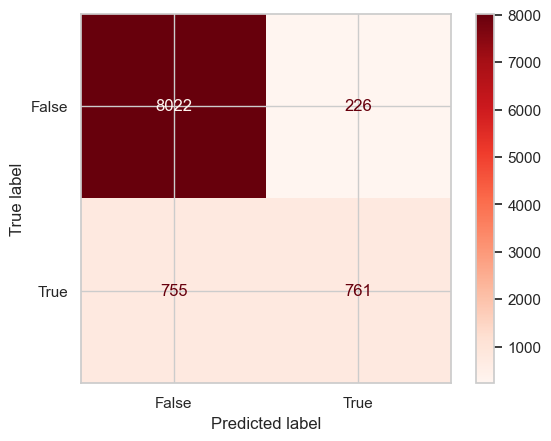

In [50]:
# Check Performance Model against Train-Set

y_pred_train = svm.predict(data_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm, data_train, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.5846645367412141 

Classification Report : 
               precision    recall  f1-score   support

       False       0.91      0.98      0.94      2049
        True       0.78      0.47      0.58       392

    accuracy                           0.89      2441
   macro avg       0.84      0.72      0.76      2441
weighted avg       0.89      0.89      0.88      2441
 

Confusion Matrix      : 


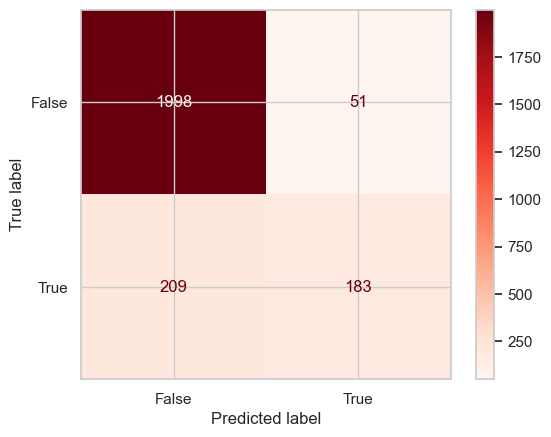

In [51]:
# Check Performance Model against Test-Set

y_pred_test = svm.predict(data_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm, data_test, y_test, cmap='Reds'))

In [52]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
train - precision,0.771023
train - recall,0.501979
train - accuracy,0.899529
train - f1_score,0.608070
test - precision,0.782051
test - recall,0.466837
test - accuracy_score,0.893486
test - f1_score,0.584665


## Hyperparameter Tunning

In [53]:
# Hyperparameter Tuning : Random Search

# Define Hyperparameters
C = [int(x) for x in np.linspace(start=1, stop=500, num = 4)]
kernel = ['rbf']
svc_search_params = {'C': C,
                     'kernel':kernel,}
svc_search_params

{'C': [1, 167, 333, 500], 'kernel': ['rbf']}

In [54]:
# Train parameter with Random Search

svc_randomcv = RandomizedSearchCV(estimator=SVC(),
                                 param_distributions=svc_search_params,
                                 n_iter=50,
                                 cv=5,
                                 random_state=10,
                                 n_jobs=-1,
                                 scoring='f1')
svc_randomcv.fit(data_train, y_train)

c:\Users\dwina\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [1, 167, 333, 500],
                                        'kernel': ['rbf']},
                   random_state=10, scoring='f1')

In [55]:
# Get Best Hyperparameters

svc_randomcv.best_params_

{'kernel': 'rbf', 'C': 167}

In [56]:
# Get Best Estimator

svc_randomcv_best = svc_randomcv.best_estimator_

F1 Score - Test Set   :  0.759307040176926 

Classification Report : 
               precision    recall  f1-score   support

       False       0.94      0.98      0.96      8248
        True       0.86      0.68      0.76      1516

    accuracy                           0.93      9764
   macro avg       0.90      0.83      0.86      9764
weighted avg       0.93      0.93      0.93      9764
 

Confusion Matrix      : 


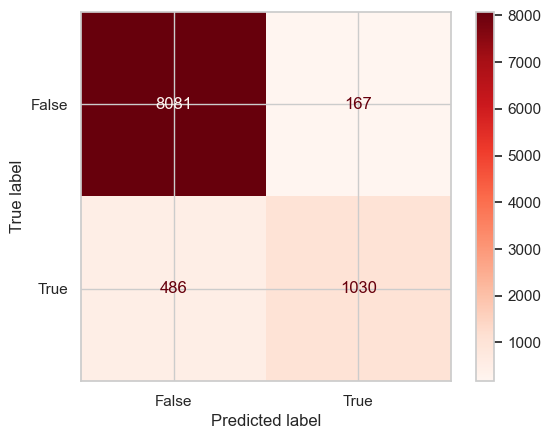

In [57]:
# Check Performance Model against Test-Set

y_pred_train = svc_randomcv_best.predict(data_train)

print('F1 Score - Test Set   : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc_randomcv_best, data_train, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.5914285714285714 

Classification Report : 
               precision    recall  f1-score   support

       False       0.91      0.95      0.93      2049
        True       0.67      0.53      0.59       392

    accuracy                           0.88      2441
   macro avg       0.79      0.74      0.76      2441
weighted avg       0.87      0.88      0.88      2441
 

Confusion Matrix      : 


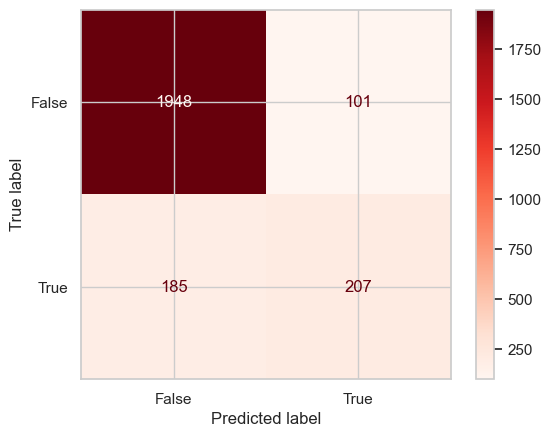

In [58]:
# Check Performance Model against Test-Set

y_pred_test = svc_randomcv_best.predict(data_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc_randomcv_best, data_test, y_test, cmap='Reds'))

In [59]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'C = 167, kernel = rbf')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),"C = 167, kernel = rbf"
train - precision,0.771023,0.860485
train - recall,0.501979,0.679420
train - accuracy,0.899529,0.933122
train - f1_score,0.608070,0.759307
test - precision,0.782051,0.672078
test - recall,0.466837,0.528061
test - accuracy_score,0.893486,0.882835
test - f1_score,0.584665,0.591429


Dari hasil hyperparameter tunning diatas menunjukan model SVC terbaik didapat dengan parameter C = 167 dan kernel = rbf. Hasil hyperparameter tersebut dapat meningkatkan nilai recall pada data test dari sebelumnya benilai 0.466 menjadi 0.528 artinya model tersebut mampu meminimalisir hasil prediksi yang salah pada target 1. Selanjutnya Permodelan ini akan menggunakan SVC dengan parameter C = 167 dan kernel = rbf.

## Pipeline

In [60]:
# membuat pipeline dari model terbaik yang didapat
num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

pipeline = make_pipeline(preprocessing_pipeline, SVC(C=167, kernel='rbf', random_state=10))
pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['VisitorType',
                                                   'Weekend'])])),
                ('svc', SVC(C=167, random_state=10))])

In [61]:
# Check performance model

y_pred_train_pipe = pipeline.predict(X_train)
y_pred_test_pipe = pipeline.predict(X_test)

print('Train')
print(classification_report(y_train_encoded, y_pred_train_pipe))
print('')

print('Test')
print(classification_report(y_test_encoded, y_pred_test_pipe))

Train
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8248
           1       0.86      0.68      0.76      1516

    accuracy                           0.93      9764
   macro avg       0.90      0.83      0.86      9764
weighted avg       0.93      0.93      0.93      9764


Test
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2049
           1       0.67      0.53      0.59       392

    accuracy                           0.88      2441
   macro avg       0.79      0.74      0.76      2441
weighted avg       0.88      0.88      0.88      2441



# Model Saving

In [62]:
# download num_columns, cat_columns dan pipeline

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('pipeline.pkl', 'wb') as file_3:
  pickle.dump(pipeline, file_3)

# Model Inference

In [63]:
# memanggil data yang sudah di download

with open('list_num_cols.txt', 'r') as file_1:
  list_num_cols = json.load(file_1)

with open('list_cat_cols.txt', 'r') as file_2:
  list_cat_cols = json.load(file_2)

with open('pipeline.pkl', 'rb') as file_3:
  pipeline = pickle.load(file_3)

In [64]:
# menggunakan data baru untuk clustering dengan model KMeans
data_inf = {
    'Administrative' : 0,
    'Administrative_Duration' : 106.321429,
    'Informational' : 4,
    'Informational_Duration' : 189.0,
    'ProductRelated' : 14,
    'ProductRelated_Duration' : 1340.750000,
    'BounceRates' : 0.000000,
    'ExitRates' : 0.010939,
    'PageValues' : 57.588923,
    'SpecialDay' : 1.0,
    'Month' : 'Mar',
    'OperatingSystems' : 2,
    'Browser' : 2,
    'Region' : 3,
    'TrafficType' : 3,
    'VisitorType' : 'Returning_Visitor',
    'Weekend' : False,
}

data_inf = pd.DataFrame([data_inf])
data_inf

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,106.321429,4,189.0,14,1340.75,0.0,0.010939,57.588923,1.0,Mar,2,2,3,3,Returning_Visitor,False


In [65]:
# Define Kategorikal dan numerical kolom

data_cat_inf = data_inf[list_cat_cols]
data_num_inf = data_inf[list_num_cols]

In [66]:
# menggabungkan categorical dan numerical
data_inf_final = pd.concat([data_cat_inf, data_num_inf], axis=1)
data_inf_final

,VisitorType,Weekend,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,Returning_Visitor,False,0,106.321429,4,189.0,14,1340.75,0.0,0.010939,57.588923,1.0


In [67]:
# Clustering dengan Metode KMeans data numeric
pred_inf = pipeline.predict(data_inf_final)
pred_inf

array([0], dtype=int64)

# Kesimpulan

Kesimpulan :

Prediksi ini menggunakan model Support Vector Machine dengan setting parameter C = 167 dan kernel = 'rbf' sebagai best hyperparameter dengan hasil f1-score accuracy 93 pada data train dan 88 pada data test. Namun nilai recall yang dihasilkan pada model ini mendapat nilai yang cukup rendah 67 pada data train dan 53 pada data test walaupun hasilnya lebih baik dari sebelum model tunning.

Kelebihan Model:
- Mampu untuk menangani data non-linear.

Kekurangan Model:
- Data yang di gunakan imbalance sehingga hasil prediksi pada target True Positif kesulitan untuk di prediksi dengan benar, saran sebelum menggunakan model ini dilakukan balancing data terlebih dahalu untuk mendapatkan hasil model yang optimal.
- Komputasi untuk model ini sangat lama, saran pada hyperparameter tunning tidak mengikutsertakan kernel untuk mengurangi biaya komputasi.


# Conseptual Problem

1. Bagging adalah penggabungan algoritma pembelajaran mesin (machine learning) yang dirancang untuk meningkatkan stabilitas dan akurasi dari algoritma machine learning yang digunakan dalam klasifikasi dan regresi. Bagging juga mengurangi varians dan membantu untuk menghindari terjadinya overfitting.

2. Dasar dari algoritma random forest adalah ide pembelajaran ensemble, yang menggabungkan beberapa pengklasifikasi untuk memecahkan masalah. Algoritma random forest terdiri dari beberapa pengklasifikasi decission tree. Pertama, setiap pohon keputusan dilatih secara individual. Kemudian, prediksi dari pohon-pohon ini diambil, dan random forest memprediksi rata-rata dari hasil-hasil ini. SVM dirancang untuk Klasifikasi Biner, SVM bekerja dengan menemukan batas keputusan yang memaksimalkan jarak dari titik data terdekat dari semua kelas. Batas ini disebut juga dengan hyperplane.

3. Cross Validation adalah salah satu teknik dalam ilmu data yang digunakan untuk mengukur sejauh mana model statistik atau algoritme pembelajaran mesin dapat digeneralisasi ke data yang belum pernah dilihat sebelumnya.